# Conjugate Bandits

In this simulation we run a single *conjugate bandits* on scenarios with different uncertainties.

### Importing libraries

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import joblib
import datetime
from tqdm import tqdm

import bandit as bdt
import agents as agt

### Parameters for the bandits

In [2]:
n_arms = 10

### Parameters for the simulations

In [3]:
n_episodes = 500
n_trials = 500

### Parameters for the settings

In [4]:
settings = ['Rewards are very similar (high al.unc.)', 
           'One rewards is the best (low al.unc.)',
           'One reward is best but high var (high ep.unc)' ]
n_settings = len(settings)

def setting1():
    # N(0,1), N(0.2,1), N(0,1), ..., N(0,1) 
    means = np.zeros(n_arms)
    means[2] = 0.2
    variances = np.ones(n_arms);
    
    bandit = bdt.GaussianBandit(n_arms)
    bandit.initialize_fixed_reward_distributions(means,variances)
    return bandit

def setting2():
    # N(0,1), N(10,1), N(0,1), ..., N(0,1) 
    means = np.zeros(n_arms)
    means[2] = 10
    variances = np.ones(n_arms);
    
    bandit = bdt.GaussianBandit(n_arms)
    bandit.initialize_fixed_reward_distributions(means,variances)
    return bandit

def setting3():
    # N(0,5), N(2,5), N(0,5), ..., N(0,5) 
    means = np.zeros(n_arms)
    means[2] = 2
    variances = np.ones(n_arms)*5;
    
    bandit = bdt.GaussianBandit(n_arms)
    bandit.initialize_fixed_reward_distributions(means,variances)
    return bandit
    

### Parameters for the agents

In [5]:
verbose = False
eta = 0.1

### Statistics to collect

In [6]:
optactions = np.zeros((n_settings, n_trials,n_episodes))
totuncertainties = np.zeros((n_settings, n_trials,n_episodes))
epuncertainties = np.zeros((n_settings, n_trials,n_episodes))

### Simulations

In [7]:
for t in tqdm(range(n_trials)):
    
    bandit = setting1()
    optimal_action = bandit.get_optimal_action()
    
    agent = agt.Agent_ConjugateGradientBoltzmann(bandit, n_arms, eta)
    agent.initialize_H_zeros()
    for e in range(n_episodes):
        action,reward = agent.run()
        totuncertainties[0,t,e] = agent.get_total_uncertainty()
        epuncertainties[0,t,e] = agent.get_epistemic_uncertainty()
        if(action==optimal_action): optactions[0,t,e]=1
               
    bandit = setting2()
    optimal_action = bandit.get_optimal_action()
    
    agent = agt.Agent_ConjugateGradientBoltzmann(bandit, n_arms, eta)
    agent.initialize_H_zeros()
    for e in range(n_episodes):
        action,reward = agent.run()
        totuncertainties[1,t,e] = agent.get_total_uncertainty()
        epuncertainties[1,t,e] = agent.get_epistemic_uncertainty()
        if(action==optimal_action): optactions[1,t,e]=1
        
    bandit = setting3()
    optimal_action = bandit.get_optimal_action()
    
    agent = agt.Agent_ConjugateGradientBoltzmann(bandit, n_arms, eta)
    agent.initialize_H_zeros()
    for e in range(n_episodes):
        action,reward = agent.run()
        totuncertainties[2,t,e] = agent.get_total_uncertainty()
        epuncertainties[2,t,e] = agent.get_epistemic_uncertainty()
        if(action==optimal_action): optactions[2,t,e]=1

100%|██████████| 500/500 [05:30<00:00,  1.51it/s]


### Saving results

In [8]:
timestamp = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
joblib.dump(optactions,'simul1B_optactions_'+timestamp+'.pkl')
joblib.dump(totuncertainties,'simul1B_totuncertainties_'+timestamp+'.pkl')
joblib.dump(epuncertainties,'simul1B_epuncertainties_'+timestamp+'.pkl')

['simul1B_epuncertainties_2020_05_24_17_49_47.pkl']

### Plotting results

Text(0.5, 1.0, 'Epistemic uncertainties')

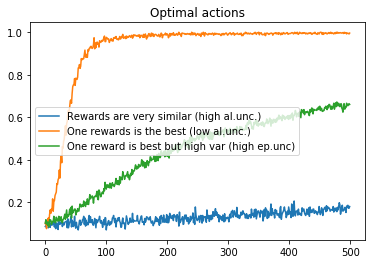

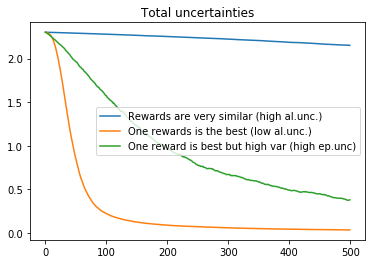

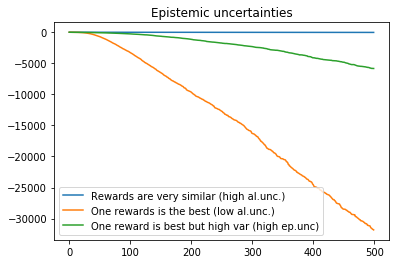

In [11]:
for i in range(n_settings):
    plt.plot(np.arange(n_episodes),np.sum(optactions[i,:,:],axis=0)/np.float(n_trials), label=settings[i])
plt.legend()
plt.title('Optimal actions')

plt.figure()
for i in range(n_settings):
    plt.plot(np.arange(n_episodes),np.mean(totuncertainties[i,:,:],axis=0), label=settings[i])
plt.legend()
plt.title('Total uncertainties')

plt.figure()
for i in range(n_settings):
    plt.plot(np.arange(n_episodes),np.mean(epuncertainties[i,:,:],axis=0), label=settings[i])
plt.legend()
plt.title('Epistemic uncertainties')